In [1]:
import numpy as np
from scipy import linalg as la
import networkx as nx
import matplotlib.pyplot as plt
from sympy import Matrix
import sympy as sy

In [43]:
mu = sy.Symbol('mu')

# Example 1

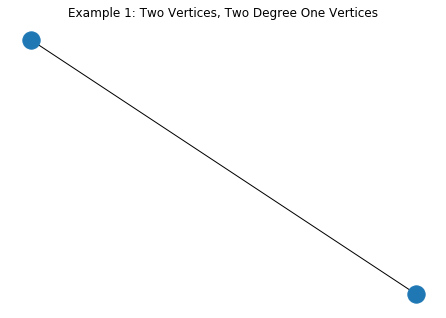

In [13]:
# Plot graph
G = nx.Graph([[1,2]])
nx.draw(G)
plt.title('Example 1: Two Vertices, Two Degree One Vertices')
plt.show()

In [14]:
Q1 = lambda mu: np.array([[mu**2,-mu],[-mu,mu**2]])
det1 = lambda mu: mu**2*(mu**2-1)

Nullity when $\mu=0$: 2


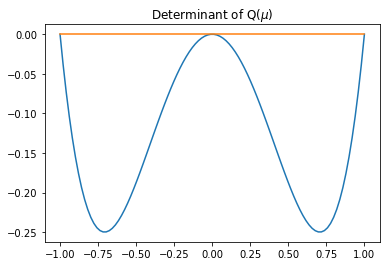

In [27]:
# Find nullity
print(f'Nullity when $\mu=0$: {Q1(0).shape[1] - Matrix(Q1(0)).rank()}')
x = np.linspace(-1,1,100)
plt.plot(x,det1(x))
plt.plot(x,[0 for _ in range(100)])
plt.title('Determinant of Q($\mu$)')
plt.show()

### Check with Sympy

In [44]:
syQ1 = Matrix([[mu**2,-mu],[-mu,mu**2]])
sydet1 = syQ1.det()

In [47]:
sy.factor(sydet1)

mu**2*(mu - 1)*(mu + 1)

# Example 2

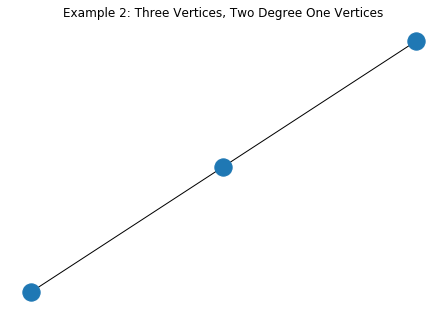

In [15]:
# Plot graph
G = nx.Graph([[1,2],[2,3]])
nx.draw(G)
plt.title('Example 2: Three Vertices, Two Degree One Vertices')
plt.show()

In [32]:
Q2 = lambda mu: np.array([[mu**2,-mu,0],[-mu,mu**2+1,-mu],[0,-mu,mu**2]])
det2 = lambda mu: 0*mu

Nullity when $\mu=0$: 2


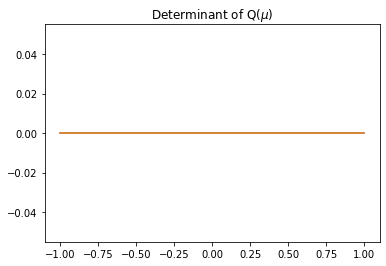

In [33]:
# Find nullity
print(f'Nullity when $\mu=0$: {Q2(0).shape[1] - Matrix(Q2(0)).rank()}')
x = np.linspace(-1,1,100)
plt.plot(x,det2(x))
plt.plot(x,[0 for _ in range(100)])
plt.title('Determinant of Q($\mu$)')
plt.show()

# Example 3

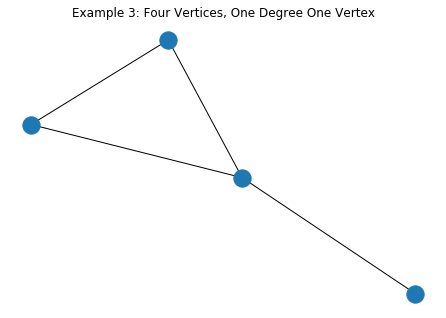

In [17]:
# Plot graph
G = nx.Graph([[1,2],[2,3],[1,3],[3,4]])
nx.draw(G)
plt.title('Example 3: Four Vertices, One Degree One Vertex')
plt.show()

In [18]:
Q3 = lambda mu: np.array([[mu**2+1,-mu,-mu,0],[-mu,mu**2+1,-mu,-mu],[-mu,-mu,mu**2+1,0],[0,-mu,0,mu**2]])
det3 = lambda mu: mu**6*(mu**2-1)

Nullity when $\mu=0$: 1


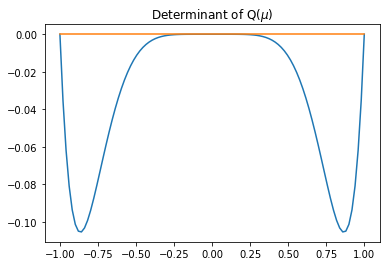

In [34]:
# Find nullity
print(f'Nullity when $\mu=0$: {Q3(0).shape[1] - Matrix(Q3(0)).rank()}')
x = np.linspace(-1,1,100)
plt.plot(x,det3(x))
plt.plot(x,[0 for _ in range(100)])
plt.title('Determinant of Q($\mu$)')
plt.show()

# Example 4

In [38]:
Q = Matrix([[mu**2+1,-mu,0,-mu,0],[-mu,mu**2+3,-mu,-mu,-mu],[0,-mu,mu**2,0,0],[-mu,-mu,0,mu**2+1,0],[0,-mu,0,0,mu**2]])

In [40]:
Q.det()

mu**10 - 2*mu**7 + mu**4

In [42]:
sy.factor(Q.det())

mu**4*(mu - 1)**2*(mu**2 + mu + 1)**2

# Using K proof on 3 vertex path

In [30]:
G = nx.Graph([[1,2],[2,3]])
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree()).values()))
I = np.eye(3)
K = np.block([[A,D-I],[-I,np.zeros_like(D)]])

In [21]:
vals, vecs = la.eig(K)

In [23]:
vecs[:,2]

array([ 0.40824829, -0.40824829,  0.40824829,  0.40824829, -0.40824829,
        0.40824829])

In [25]:
syK = Matrix(K)

In [26]:
syK.is_diagonalizable()

False

In [56]:
S = np.array([[0,0,0,1,0,0],[0,0,-1/np.sqrt(2),0,0,1/np.sqrt(2)],[0,0,0,0,1,0],[1,0,0,0,0,0],[0,0,1/np.sqrt(2),0,0,1/np.sqrt(2)],[0,1,0,0,0,0]])

In [59]:
S = S[:,[0,1,3,4,2,5]]

In [62]:
S.T@K@S

matrix([[ 0.        ,  0.        , -1.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        , -1.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        , -0.70710678,
          0.70710678],
        [ 0.        ,  0.        ,  0.        ,  0.        , -0.70710678,
          0.70710678],
        [ 0.        ,  0.        , -0.70710678, -0.70710678,  0.        ,
         -1.        ],
        [ 0.        ,  0.        ,  0.70710678,  0.70710678,  1.        ,
          0.        ]])

In [52]:
vals

array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -1.00000000e+00+0.j,
        1.00000000e+00+0.j, -9.41311776e-25+0.j,  0.00000000e+00+0.j])

 For lambda = -1

In [36]:
S = np.array([[1,1,0,0,0,0],[-1,-1,-1,0,1,0],[1,1,0,-1,0,1],[1,-1,0,0,0,0],[-1,1,1,0,1,0],[1,-1,0,1,0,1]])
KS = K@S
S.T@KS

matrix([[-6., -8., -4.,  2.,  2., -2.],
        [ 0., -2., -2.,  0.,  0.,  0.],
        [ 0., -2.,  0.,  1., -2., -1.],
        [ 0.,  0.,  1.,  1., -1., -1.],
        [ 2.,  4.,  2., -1.,  0.,  1.],
        [-2., -2., -1.,  1.,  1., -1.]])

For lambda = 1

In [40]:
S = np.array([[1,1,0,0,0,0],[1,1,-1,0,1,0],[1,1,0,-1,0,1],[-1,1,0,0,0,0],[-1,1,1,0,1,0],[-1,1,0,1,0,1]])
KS = K@S
S.T@KS

matrix([[ 6.,  8., -2., -2.,  4.,  2.],
        [ 0.,  2.,  0.,  0.,  2.,  0.],
        [-2., -4.,  0.,  1., -2., -1.],
        [-2., -2.,  1.,  1., -1., -1.],
        [ 0.,  2.,  2., -1.,  0.,  1.],
        [ 0.,  0., -1.,  1.,  1., -1.]])

# $C_4$ Graph with K Proof

In [5]:
# Create graph
C4 = nx.cycle_graph(4)
A = nx.adjacency_matrix(C4).todense()
D = np.diag(list(dict(C4.degree()).values()))
K = np.block([[A,D-np.eye(4)],[-np.eye(4),np.zeros((4,4))]])

In [46]:
vals, vecs = la.eig(K)

In [47]:
vals

array([-0.99999999+0.j, -1.00000001+0.j,  1.00000002+0.j,  0.99999998+0.j,
        0.        +1.j,  0.        -1.j,  0.        +1.j,  0.        -1.j])

For lambda = -1

In [48]:
S = np.array([[-1,-1,0,0,0,0,0,0],[1,1,-1,0,0,1,0,0],[-1,-1,0,-1,0,0,1,0],[1,1,0,0,-1,0,0,1],[-1,1,0,0,0,0,0,0],[1,-1,1,0,0,1,0,0],[-1,1,0,1,0,0,1,0],[1,-1,0,0,1,0,0,1]])

In [49]:
KS = K@S

In [51]:
S.T@KS

matrix([[ -8., -16.,   4.,  -4.,   4.,  -2.,   2.,  -2.],
        [  0.,  -8.,   2.,  -2.,   2.,   0.,   0.,   0.],
        [  0.,   2.,   0.,   1.,   0.,  -2.,  -1.,   0.],
        [  0.,  -2.,   1.,   0.,   1.,  -1.,  -2.,  -1.],
        [  0.,   2.,   0.,   1.,   0.,   0.,  -1.,  -2.],
        [ -2.,  -4.,   2.,  -1.,   0.,   0.,   1.,   0.],
        [  2.,   4.,  -1.,   2.,  -1.,   1.,   0.,   1.],
        [ -2.,  -4.,   0.,  -1.,   2.,   0.,   1.,   0.]])

For lambda = i

In [52]:
S = np.array([[0,1j,0,-1,0,0,0,0],[1j,0,-1,0,0,0,0,0],[0,-1j,0,1,-1,0,1,0],[-1j,0,1,0,0,-1,0,1],[0,-1,0,1j,0,0,0,0],[-1,0,1j,0,0,0,0,0],[0,1,0,-1j,1,0,1,0],[1,0,-1j,0,0,1,0,1]])

In [54]:
KS = K@S

In [56]:
S.T@KS

matrix([[ 0.+0.j,  0.+0.j, -4.+0.j,  0.+0.j,  0.+0.j,  1.-1.j,  0.+0.j,
         -1.-1.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -4.+0.j,  1.-1.j,  0.+0.j, -1.-1.j,
          0.+0.j],
        [ 4.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.-1.j,  0.+0.j,
          1.+1.j],
        [ 0.+0.j,  4.+0.j,  0.+0.j,  0.+0.j,  1.-1.j,  0.+0.j,  1.+1.j,
          0.+0.j],
        [ 0.+0.j, -1.+1.j,  0.+0.j, -1.+1.j,  0.+0.j,  1.+0.j, -2.+0.j,
         -1.+0.j],
        [-1.+1.j,  0.+0.j, -1.+1.j,  0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j,
         -2.+0.j],
        [ 0.+0.j,  1.+1.j,  0.+0.j, -1.-1.j,  2.+0.j, -1.+0.j,  0.+0.j,
          1.+0.j],
        [ 1.+1.j,  0.+0.j, -1.-1.j,  0.+0.j, -1.+0.j,  2.+0.j,  1.+0.j,
          0.+0.j]])

For lambda = -i

In [6]:
S = np.array([[0,-1j,0,-1,0,0,0,0],[-1j,0,-1,0,0,0,0,0],[0,1j,0,1,-1,0,1,0],[1j,0,1,0,0,-1,0,1],[0,-1,0,-1j,0,0,0,0],[-1,0,-1j,0,0,0,0,0],[0,1,0,1j,1,0,1,0],[1,0,1j,0,0,1,0,1]])

In [7]:
KS = K@S

In [9]:
S.T@KS

matrix([[ 0.+0.j,  0.+0.j, -4.+0.j,  0.+0.j,  0.+0.j,  1.+1.j,  0.+0.j,
         -1.+1.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -4.+0.j,  1.+1.j,  0.+0.j, -1.+1.j,
          0.+0.j],
        [ 4.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+1.j,  0.+0.j,
          1.-1.j],
        [ 0.+0.j,  4.+0.j,  0.+0.j,  0.+0.j,  1.+1.j,  0.+0.j,  1.-1.j,
          0.+0.j],
        [ 0.+0.j, -1.-1.j,  0.+0.j, -1.-1.j,  0.+0.j,  1.+0.j, -2.+0.j,
         -1.+0.j],
        [-1.-1.j,  0.+0.j, -1.-1.j,  0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j,
         -2.+0.j],
        [ 0.+0.j,  1.-1.j,  0.+0.j, -1.+1.j,  2.+0.j, -1.+0.j,  0.+0.j,
          1.+0.j],
        [ 1.-1.j,  0.+0.j, -1.+1.j,  0.+0.j, -1.+0.j,  2.+0.j,  1.+0.j,
          0.+0.j]])

For lambda = 1

In [10]:
S = np.array([[-1,1,0,0,0,0,0,0],[-1,1,-1,0,0,1,0,0],[-1,1,0,-1,0,0,1,0],[-1,1,0,0,-1,0,0,1],[1,1,0,0,0,0,0,0],[1,1,1,0,0,1,0,0],[1,1,0,1,0,0,1,0],[1,1,0,0,1,0,0,1]])

In [11]:
S

array([[-1,  1,  0,  0,  0,  0,  0,  0],
       [-1,  1, -1,  0,  0,  1,  0,  0],
       [-1,  1,  0, -1,  0,  0,  1,  0],
       [-1,  1,  0,  0, -1,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  0,  1,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  1,  0,  0,  1]])

In [12]:
KS = K@S

In [13]:
KS

matrix([[-1.,  3., -1.,  0., -1.,  1.,  0.,  1.],
        [-1.,  3.,  1., -1.,  0.,  1.,  1.,  0.],
        [-1.,  3., -1.,  1., -1.,  1.,  1.,  1.],
        [-1.,  3.,  0., -1.,  1.,  0.,  1.,  1.],
        [ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -1.,  1.,  0.,  0., -1.,  0.,  0.],
        [ 1., -1.,  0.,  1.,  0.,  0., -1.,  0.],
        [ 1., -1.,  0.,  0.,  1.,  0.,  0., -1.]])

In [14]:
S.T@KS

matrix([[  8., -16.,   2.,   2.,   2.,  -4.,  -4.,  -4.],
        [  0.,   8.,   0.,   0.,   0.,   2.,   2.,   2.],
        [  2.,  -4.,   0.,   1.,   0.,  -2.,  -1.,   0.],
        [  2.,  -4.,   1.,   0.,   1.,  -1.,  -2.,  -1.],
        [  2.,  -4.,   0.,   1.,   0.,   0.,  -1.,  -2.],
        [  0.,   2.,   2.,  -1.,   0.,   0.,   1.,   0.],
        [  0.,   2.,  -1.,   2.,  -1.,   1.,   0.,   1.],
        [  0.,   2.,   0.,  -1.,   2.,   0.,   1.,   0.]])

# $K_4$ graph with K proof

In [15]:
G = nx.complete_graph(4)
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree()).values()))
I = np.eye(4)
K = np.block([[A,D-I],[-I,np.zeros_like(D)]])

In [24]:
test_k = Matrix(K)
test_k.is_diagonalizable()

True

For lambda = 2

In [19]:
S = np.array([[-2,1,0,0,0,0,0,0],[-2,1,-1,0,0,1,0,0],[-2,1,0,-1,0,0,1,0],[-2,1,0,0,-1,0,0,1],[1,2,0,0,0,0,0,0],[1,2,1,0,0,1,0,0],[1,2,0,1,0,0,1,0],[1,2,0,0,1,0,0,1]])

In [20]:
S

array([[-2,  1,  0,  0,  0,  0,  0,  0],
       [-2,  1, -1,  0,  0,  1,  0,  0],
       [-2,  1,  0, -1,  0,  0,  1,  0],
       [-2,  1,  0,  0, -1,  0,  0,  1],
       [ 1,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  1,  0,  0,  1,  0,  0],
       [ 1,  2,  0,  1,  0,  0,  1,  0],
       [ 1,  2,  0,  0,  1,  0,  0,  1]])

In [21]:
KS = K@S

In [23]:
S.T@KS

matrix([[ 40., -60.,   3.,   3.,   3., -11., -11., -11.],
        [  0.,  20.,   1.,   1.,   1.,   3.,   3.,   3.],
        [  6.,  -8.,  -1.,   1.,   1.,  -3.,  -1.,  -1.],
        [  6.,  -8.,   1.,  -1.,   1.,  -1.,  -3.,  -1.],
        [  6.,  -8.,   1.,   1.,  -1.,  -1.,  -1.,  -3.],
        [ -2.,   6.,   3.,  -1.,  -1.,   1.,   1.,   1.],
        [ -2.,   6.,  -1.,   3.,  -1.,   1.,   1.,   1.],
        [ -2.,   6.,  -1.,  -1.,   3.,   1.,   1.,   1.]])

For lambda = $\frac{1}{2}(-1+i\sqrt{7})$

In [25]:
mu = 1/2*(-1+1j*np.sqrt(7))
S = np.array([[mu,mu,mu,-1,-1,-1,0,0],[0,0,-mu,0,0,1,0,0],[0,-mu,0,0,1,0,0,0],[-mu,0,0,1,0,0,-1,1],[-1,-1,-1,-np.conj(mu),-np.conj(mu),-np.conj(mu),0,0],[0,0,1,0,0,np.conj(mu),0,0],[0,1,0,0,np.conj(mu),0,0,0],[1,0,0,np.conj(mu),0,0,1,1]])

In [26]:
S

array([[-0.5+1.32287566j, -0.5+1.32287566j, -0.5+1.32287566j,
        -1. +0.j        , -1. +0.j        , -1. +0.j        ,
         0. +0.j        ,  0. +0.j        ],
       [ 0. +0.j        ,  0. +0.j        ,  0.5-1.32287566j,
         0. +0.j        ,  0. +0.j        ,  1. +0.j        ,
         0. +0.j        ,  0. +0.j        ],
       [ 0. +0.j        ,  0.5-1.32287566j,  0. +0.j        ,
         0. +0.j        ,  1. +0.j        ,  0. +0.j        ,
         0. +0.j        ,  0. +0.j        ],
       [ 0.5-1.32287566j,  0. +0.j        ,  0. +0.j        ,
         1. +0.j        ,  0. +0.j        ,  0. +0.j        ,
        -1. +0.j        ,  1. +0.j        ],
       [-1. +0.j        , -1. +0.j        , -1. +0.j        ,
         0.5+1.32287566j,  0.5+1.32287566j,  0.5+1.32287566j,
         0. +0.j        ,  0. +0.j        ],
       [ 0. +0.j        ,  0. +0.j        ,  1. +0.j        ,
         0. +0.j        ,  0. +0.j        , -0.5-1.32287566j,
         0. +0.j        ,  0. +

In [27]:
S.T@K@S

matrix([[  4. +0.j        ,   2. +0.j        ,   2. +0.j        ,
         -11. +2.64575131j,  -5.5+1.32287566j,  -5.5+1.32287566j,
           2.5-3.96862697j,  -0.5-1.32287566j],
        [  2. +0.j        ,   4. +0.j        ,   2. +0.j        ,
          -5.5+1.32287566j, -11. +2.64575131j,  -5.5+1.32287566j,
           0. +0.j        ,   0. +0.j        ],
        [  2. +0.j        ,   2. +0.j        ,   4. +0.j        ,
          -5.5+1.32287566j,  -5.5+1.32287566j, -11. +2.64575131j,
           0. +0.j        ,   0. +0.j        ],
        [  7. +2.64575131j,   3.5+1.32287566j,   3.5+1.32287566j,
          -3. -2.64575131j,  -1.5-1.32287566j,  -1.5-1.32287566j,
           2.5-1.32287566j,   1.5+1.32287566j],
        [  3.5+1.32287566j,   7. +2.64575131j,   3.5+1.32287566j,
          -1.5-1.32287566j,  -3. -2.64575131j,  -1.5-1.32287566j,
           0. +0.j        ,   0. +0.j        ],
        [  3.5+1.32287566j,   3.5+1.32287566j,   7. +2.64575131j,
          -1.5-1.32287566j,  -1.5-

 For lambda = $\frac{1}{2}(-1-i\sqrt{7})$

In [28]:
mu = 1/2*(-1-1j*np.sqrt(7))
S = np.array([[mu,mu,mu,-1,-1,-1,0,0],[0,0,-mu,0,0,1,0,0],[0,-mu,0,0,1,0,0,0],[-mu,0,0,1,0,0,-1,1],[-1,-1,-1,-np.conj(mu),-np.conj(mu),-np.conj(mu),0,0],[0,0,1,0,0,np.conj(mu),0,0],[0,1,0,0,np.conj(mu),0,0,0],[1,0,0,np.conj(mu),0,0,1,1]])

In [29]:
S

array([[-0.5-1.32287566j, -0.5-1.32287566j, -0.5-1.32287566j,
        -1. +0.j        , -1. +0.j        , -1. +0.j        ,
         0. +0.j        ,  0. +0.j        ],
       [ 0. +0.j        ,  0. +0.j        ,  0.5+1.32287566j,
         0. +0.j        ,  0. +0.j        ,  1. +0.j        ,
         0. +0.j        ,  0. +0.j        ],
       [ 0. +0.j        ,  0.5+1.32287566j,  0. +0.j        ,
         0. +0.j        ,  1. +0.j        ,  0. +0.j        ,
         0. +0.j        ,  0. +0.j        ],
       [ 0.5+1.32287566j,  0. +0.j        ,  0. +0.j        ,
         1. +0.j        ,  0. +0.j        ,  0. +0.j        ,
        -1. +0.j        ,  1. +0.j        ],
       [-1. +0.j        , -1. +0.j        , -1. +0.j        ,
         0.5-1.32287566j,  0.5-1.32287566j,  0.5-1.32287566j,
         0. +0.j        ,  0. +0.j        ],
       [ 0. +0.j        ,  0. +0.j        ,  1. +0.j        ,
         0. +0.j        ,  0. +0.j        , -0.5+1.32287566j,
         0. +0.j        ,  0. +

In [30]:
S.T@K@S

matrix([[  4. +0.j        ,   2. +0.j        ,   2. +0.j        ,
         -11. -2.64575131j,  -5.5-1.32287566j,  -5.5-1.32287566j,
           2.5+3.96862697j,  -0.5+1.32287566j],
        [  2. +0.j        ,   4. +0.j        ,   2. +0.j        ,
          -5.5-1.32287566j, -11. -2.64575131j,  -5.5-1.32287566j,
           0. +0.j        ,   0. +0.j        ],
        [  2. +0.j        ,   2. +0.j        ,   4. +0.j        ,
          -5.5-1.32287566j,  -5.5-1.32287566j, -11. -2.64575131j,
           0. +0.j        ,   0. +0.j        ],
        [  7. -2.64575131j,   3.5-1.32287566j,   3.5-1.32287566j,
          -3. +2.64575131j,  -1.5+1.32287566j,  -1.5+1.32287566j,
           2.5+1.32287566j,   1.5-1.32287566j],
        [  3.5-1.32287566j,   7. -2.64575131j,   3.5-1.32287566j,
          -1.5+1.32287566j,  -3. +2.64575131j,  -1.5+1.32287566j,
           0. +0.j        ,   0. +0.j        ],
        [  3.5-1.32287566j,   3.5-1.32287566j,   7. -2.64575131j,
          -1.5+1.32287566j,  -1.5+

For lambda = 1

In [31]:
S = np.array([[-1,1,0,0,0,0,0,0],[-1,1,-1,0,0,1,0,0],[-1,1,0,-1,0,0,1,0],[-1,1,0,0,-1,0,0,1],[1,1,0,0,0,0,0,0],[1,1,1,0,0,1,0,0],[1,1,0,1,0,0,1,0],[1,1,0,0,1,0,0,1]])

In [32]:
S

array([[-1,  1,  0,  0,  0,  0,  0,  0],
       [-1,  1, -1,  0,  0,  1,  0,  0],
       [-1,  1,  0, -1,  0,  0,  1,  0],
       [-1,  1,  0,  0, -1,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  0,  1,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  1,  0,  0,  1]])

In [33]:
S.T@K@S

matrix([[  8., -24.,   2.,   2.,   2.,  -6.,  -6.,  -6.],
        [  0.,  16.,   0.,   0.,   0.,   4.,   4.,   4.],
        [  2.,  -6.,  -1.,   1.,   1.,  -3.,  -1.,  -1.],
        [  2.,  -6.,   1.,  -1.,   1.,  -1.,  -3.,  -1.],
        [  2.,  -6.,   1.,   1.,  -1.,  -1.,  -1.,  -3.],
        [  0.,   4.,   3.,  -1.,  -1.,   1.,   1.,   1.],
        [  0.,   4.,  -1.,   3.,  -1.,   1.,   1.,   1.],
        [  0.,   4.,  -1.,  -1.,   3.,   1.,   1.,   1.]])

In [37]:
la.eig(K) 

(array([ 2. +0.j        ,  1. +0.j        , -0.5+1.32287566j,
        -0.5-1.32287566j, -0.5+1.32287566j, -0.5-1.32287566j,
        -0.5+1.32287566j, -0.5-1.32287566j]),
 array([[ 0.4472136 +0.j        , -0.35355339+0.j        ,
         -0.05479654+0.38107699j, -0.05479654-0.38107699j,
          0.60062974+0.j        ,  0.60062974-0.j        ,
         -0.15007674+0.11345877j, -0.15007674-0.11345877j],
        [ 0.4472136 +0.j        , -0.35355339+0.j        ,
          0.54153029+0.j        ,  0.54153029-0.j        ,
         -0.37802652+0.24700722j, -0.37802652-0.24700722j,
          0.27920806-0.07305462j,  0.27920806+0.07305462j],
        [ 0.4472136 +0.j        , -0.35355339+0.j        ,
         -0.3407031 -0.10342969j, -0.3407031 +0.10342969j,
         -0.13737949-0.27408826j, -0.13737949+0.27408826j,
          0.45408966-0.04040415j,  0.45408966+0.04040415j],
        [ 0.4472136 +0.j        , -0.35355339+0.j        ,
         -0.14603065-0.2776473j , -0.14603065+0.2776473j ,
 